In [1]:
#Import all the dependencies
import pandas as pd
import re
from nltk import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
%matplotlib inline

### LDA

In [ ]:
#load trained LDA model 
lda_model = pickle.load(open("LDA50kfictionnewclean/lda_model.pk", "rb"))

In [3]:
df_topics = pd.read_csv('LDA50kfictionnewclean/df_document_topic.csv')
df_topics = df_topics.drop(columns = 'Unnamed: 0',axis = 1)
df_topics

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,...,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008
1,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,...,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009
2,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,...,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006
3,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,...,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005
4,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,...,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006
49996,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,...,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007
49997,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,...,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008
49998,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,...,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008


In [4]:
topic_matrix = pd.read_csv('LDA50kfictionnewclean/df_topic_keywords.csv')
topic_matrix = topic_matrix.drop(columns = 'Unnamed: 0',axis = 1)
topic_matrix

,aa,aaagh,aachim,aaly,aames,aan,aang,aarde,aardvark,aari,...,zweck,zwei,zweifel,zweig,zweilt,zweite,zwichrowanej,zwigoff,zwischen,zzzap
0,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,...,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005
1,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,...,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005
2,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,...,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005
3,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,...,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005
4,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,...,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,...,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005
1996,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,...,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005
1997,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,...,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005
1998,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,...,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005


### LDA - Most Popular Topics

In [5]:
df_topics['topic'] = df_topics.idxmax(axis = 1, skipna = True) 

In [6]:
#Most commmon topics 
common_topics = df_topics.groupby(by = 'topic').size().reset_index(name = 'count')
common_topics['percentage'] = common_topics['count'] / len(df_topics) * 100
common_topics = common_topics.sort_values(by='percentage',ascending = False)
common_topics_top10 = common_topics.head(n=10)
common_topics_top10

,topic,count,percentage
48,1040,188,0.376
733,1658,178,0.356
833,1748,132,0.264
991,1890,129,0.258
329,1294,112,0.224
866,1778,106,0.212
1334,4,88,0.176
16,1011,81,0.162
1126,211,78,0.156
564,1505,74,0.148


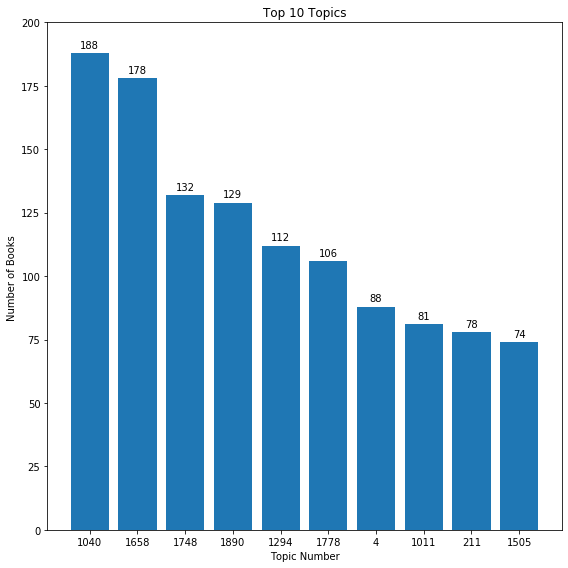

In [7]:
#Plot most common topics
fig, ax = plt.subplots(figsize = (8,8))
#font size
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=12)    
plt.rc('ytick', labelsize=12)    

plt.bar(common_topics_top10['topic'],common_topics_top10['count'])
plt.ylim (0,200)
plt.title('Top 10 Topics')
plt.ylabel('Number of Books ')
plt.xlabel('Topic Number')
ax.grid(False)

#label
for p in ax.patches: 
    ax.annotate(p.get_height(), \
                xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
fig.tight_layout()
plt.show()

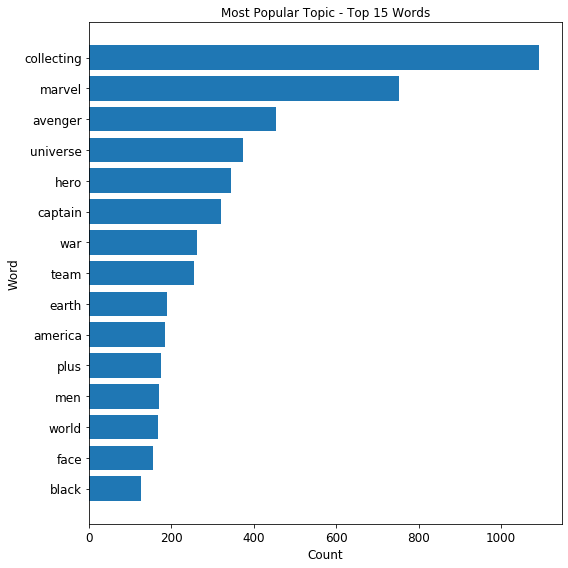

In [8]:
#Common words in top topic (1040)
topic = topic_matrix.iloc[1040,:]
words = topic.nlargest(15)
words = words.sort_values(ascending = True)

fig, ax = plt.subplots(figsize = (8,8))

#font size
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=12)    
plt.rc('ytick', labelsize=12)    

plt.barh(words.index,words.values)
#plt.ylim (0,200)
plt.title('Most Popular Topic - Top 15 Words')
plt.ylabel('Word')
plt.xlabel('Count')
ax.grid(False)

fig.tight_layout()

plt.show()

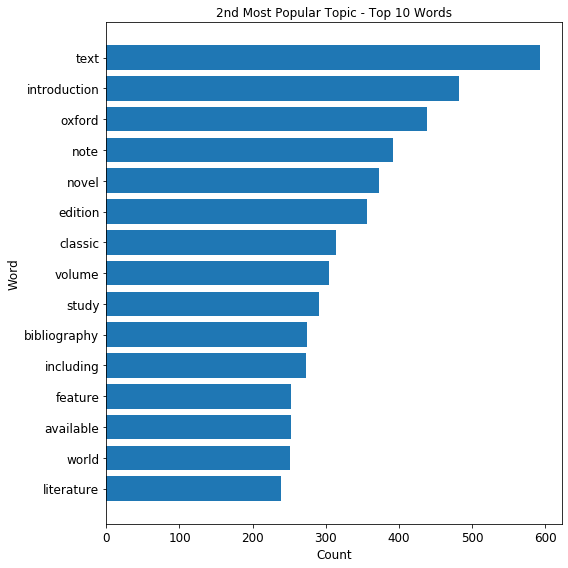

In [9]:
#Common words in top topic (1658)
topic = topic_matrix.iloc[1658,:]
words = topic.nlargest(15)
words = words.sort_values(ascending = True)

fig, ax = plt.subplots(figsize = (8,8))

#font size
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=12)    
plt.rc('ytick', labelsize=12)    

plt.barh(words.index,words.values)
#plt.ylim (0,200)
plt.title('2nd Most Popular Topic - Top 10 Words')
plt.ylabel('Word')
plt.xlabel('Count')
ax.grid(False)

fig.tight_layout()

plt.show()

### Doc2Vec - tSNE Visualisation

In [13]:
# #Load model
# model= Doc2Vec.load("doc2vec_v1/d2v_v1.model")

In [64]:
# books = pd.read_csv('doc2vec_v1/books_train.csv')

In [65]:
books1 = books.copy()
books1.head()

,isbn10,isbn13,rating-avg,rating-count,title,description,genres,description_original,description_length,genres_length
0,552576484,9.780553e+12,4.07,287187.0,"Everything, Everything",major motion picture starring amanda stenberg ...,"'young-adult', 'romance', 'contemporary', 'fic...","<b><i>Everything, Everything</i> is now a majo...",61,17
1,241255775,9.780241e+12,3.63,1129.0,Anna of the Five Towns,deeply moving original dealing material encoun...,"'classics', 'fiction', 'historical-fiction', '...","<b>'Deeply moving, original, and dealing with ...",54,18
2,1536607398,9.781537e+12,4.11,893.0,Ghost Run,acclaimed eagerly anticipated fourth thriller ...,"'zombies', 'horror', 'post-apocalyptic', 'fict...",The acclaimed and eagerly anticipated fourth t...,82,12
3,719078385,9.780719e+12,3.23,440.0,"Epicene, or the Silent Woman : By Ben Jonson",epicene widely studied johnson play brilliantl...,"'plays', 'drama', 'classics', '17th-century', ...",<i>Epicene </i>is now one of the most widely-s...,93,15
4,60539526,9.780061e+12,4.01,274.0,Little Critter : The Lost Dinosaur Bone,little critter class going critterville museum...,"'picture-books', 'dinosaurs', 'science', 'fict...",Little Critter's class is going to the Critter...,35,9


In [66]:
#genrelist
books1['genrelist'] = books1['genres'].apply(lambda x: x[1:-1].split("', '"))
#obtain the first genre from genre list 
books1['genre1'] = books1['genrelist'].apply(lambda x: x[0])
books1

,isbn10,isbn13,rating-avg,rating-count,title,description,genres,description_original,description_length,genres_length,genrelist,genre1
0,552576484,9.780553e+12,4.07,287187.0,"Everything, Everything",major motion picture starring amanda stenberg ...,"'young-adult', 'romance', 'contemporary', 'fic...","<b><i>Everything, Everything</i> is now a majo...",61,17,"[young-adult, romance, contemporary, fiction, ...",young-adult
1,241255775,9.780241e+12,3.63,1129.0,Anna of the Five Towns,deeply moving original dealing material encoun...,"'classics', 'fiction', 'historical-fiction', '...","<b>'Deeply moving, original, and dealing with ...",54,18,"[classics, fiction, historical-fiction, litera...",classics
2,1536607398,9.781537e+12,4.11,893.0,Ghost Run,acclaimed eagerly anticipated fourth thriller ...,"'zombies', 'horror', 'post-apocalyptic', 'fict...",The acclaimed and eagerly anticipated fourth t...,82,12,"[zombies, horror, post-apocalyptic, fiction, s...",zombies
3,719078385,9.780719e+12,3.23,440.0,"Epicene, or the Silent Woman : By Ben Jonson",epicene widely studied johnson play brilliantl...,"'plays', 'drama', 'classics', '17th-century', ...",<i>Epicene </i>is now one of the most widely-s...,93,15,"[plays, drama, classics, 17th-century, school,...",plays
4,60539526,9.780061e+12,4.01,274.0,Little Critter : The Lost Dinosaur Bone,little critter class going critterville museum...,"'picture-books', 'dinosaurs', 'science', 'fict...",Little Critter's class is going to the Critter...,35,9,"[picture-books, dinosaurs, science, fiction, c...",picture-books
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,345452380,9.780345e+12,3.86,3798.0,Ammonite,change die option available planet jeep centur...,"'science-fiction', 'fiction', 'lgbt', 'fantasy...",Change or die. These are the only options avai...,83,24,"[science-fiction, fiction, lgbt, fantasy, quee...",science-fiction
49996,743429605,9.780743e+12,4.08,418.0,Star Trek: New Frontier: Blind Man's Bluff,captain mackenzie calhoun faced incredible odd...,"'star-trek', 'science-fiction', 'fiction', 'sp...",<p>Captain MacKenzie Calhoun has faced incredi...,69,8,"[star-trek, science-fiction, fiction, space-op...",star-trek
49997,1760297461,9.781760e+12,3.86,344.0,When We Have Wings,world divided flier non flier far able fly sac...,"'fantasy', 'science-fiction', 'dystopia', 'fic...","In a world divided into fliers and non-fliers,...",62,15,"[fantasy, science-fiction, dystopia, fiction, ...",fantasy
49998,1785942816,9.781786e+12,3.69,1011.0,Doctor Who: The Crawling Terror (12th Doctor n...,doubt ll bigger insect gabby nichols putting s...,"'doctor-who', 'science-fiction', 'fiction', 'f...","<i>“Well, I doubt you’ll ever see a bigger ins...",63,13,"[doctor-who, science-fiction, fiction, fantasy...",doctor-who


In [67]:
# top gender based on first genre in list 
books1.groupby('genre1').size().reset_index(name = 'count').sort_values(by = 'count',ascending = False).head(n=10)

,genre1,count
93,fiction,6253
183,mystery,6248
224,romance,4865
91,fantasy,4024
56,comics,2702
53,classics,2553
165,manga,2470
233,science-fiction,2167
123,historical-fiction,2104
285,young-adult,1729


In [68]:
# filter books with top 3 genres (excluding fiction)
list_genre = ['romance','mystery','fantasy']
books_filtered = books1[books1['genre1'].isin(list_genre)]
print(books_filtered.shape)

#filter 1k books to plot 
books_plot = books_filtered.sample(1000,random_state = 3)
index = list(books_plot.index) #obtain index of chosen books
books_plot.head()

(15137, 12)


,isbn10,isbn13,rating-avg,rating-count,title,description,genres,description_original,description_length,genres_length,genrelist,genre1
36771,1455812625,9.781456e+12,4.13,2377.0,Gotcha!,justice long time coming case julie wyatt stor...,"'mystery', 'fiction', 'romance', 'chick-lit', ...","They're back...!<br /><br />Sometimes, justice...",64,10,"[mystery, fiction, romance, chick-lit, suspens...",mystery
103,1501295012,9.781501e+12,3.84,1901.0,Web of the Witch World,andre norton enthralled reader decade thrillin...,"'fantasy', 'science-fiction', 'fiction', 'scie...",Andre Norton enthralled readers for decades wi...,43,16,"[fantasy, science-fiction, fiction, science-fi...",fantasy
49562,996875689,9.780997e+12,4.09,6230.0,Beach Rental (Large Print),crystal coast north carolina small town emeral...,"'romance', 'contemporary', 'fiction', 'contemp...","On the Crystal Coast of North Carolina, in the...",75,7,"[romance, contemporary, fiction, contemporary-...",romance
19988,1472118820,9.781472e+12,3.63,72.0,Mammoth Book Of Sherlock Holmes Abroad,wonderful anthology story sherlock holmes trav...,"'mystery', 'historical-fiction', 'short-storie...","In this wonderful anthology of new stories, Sh...",58,15,"[mystery, historical-fiction, short-stories, s...",mystery
8586,149159294X,9.781492e+12,4.17,10957.0,No Turning Back,bartender night law firm runner day help end m...,"'romance', 'romantic-suspense', 'mystery', 'su...",Being a bartender by night and law firm runner...,79,17,"[romance, romantic-suspense, mystery, suspense...",romance


In [ ]:
# transform data for first 5k books(trained)
tsne = TSNE(n_components=2, random_state=0)
%time tsne_d2v = tsne.fit_transform(model.docvecs.vectors_docs[[index]]) #only transform data for selected book index

tsne_d2v_df = pd.DataFrame(data=tsne_d2v, columns=["x", "y"])  
tsne_d2v_df

In [70]:
#construct dataset to plot tsne
data = tsne_d2v_df.copy()
plot_genre = books_plot.reset_index(drop=True)
data['genre'] = plot_genre['genre1']
data.head()

,x,y,genre
0,-9.129967,-7.995615,mystery
1,-5.440204,17.137455,fantasy
2,16.783949,-8.482388,romance
3,-8.904034,-0.625165,mystery
4,3.690088,-5.587233,romance


Number of books: 1000


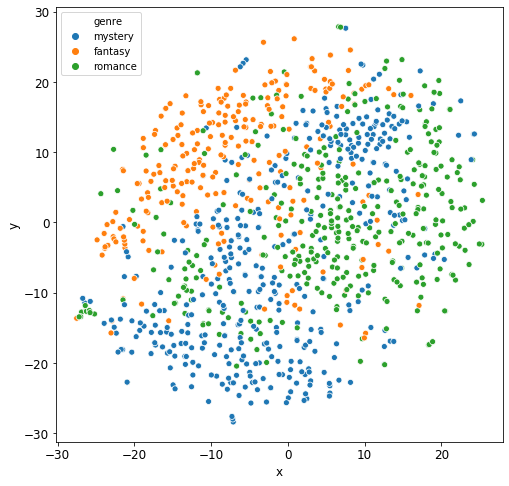

In [71]:
# Plot document distributions for books that belong to the top 3 genres 
print('Number of books:', len(data))
fig, ax = plt.subplots(figsize = (8,8))
ax.grid(False)
sns.scatterplot(x = 'x', y= 'y', data= data, hue = 'genre')
plt.show()

In [72]:
# plot word vectors for 1 doc 

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]',' ',text) #only keep letters
    return text

books2 = books.copy()
books2['description'] = books2['description'].apply(lambda x: clean_text(x))

In [73]:
def book_word_vec(book_index):
    book_title = books2.loc[book_index,'title']
    book_des_original = books2.loc[book_index,'description_original']
    book_des = books2.loc[book_index,'description']
    book_genre = books2.loc[book_index,'genres']
    #tokenize book description
    words = word_tokenize(book_des)
    #word vectors for words in document
    word_vectors = []
    for x in words: 
        vector = model[x]
        word_vectors.append(vector)
    word_vectors_df = pd.DataFrame(word_vectors)
    
    #tsne
    tsne = TSNE(n_components=2, random_state=0)
    tsne_array = tsne.fit_transform(word_vectors_df)
    #convert to df
    tsne_df = pd.DataFrame(data=tsne_array, columns=['x', 'y'])  
    tsne_df['word'] = words
    
    print('Book Title:', book_title)
    print('Book description:\n', book_des_original)
    print('Book genre:',book_genre)
    # Plot document distributions for books that belong to the top 3 genres 
    fig, ax = plt.subplots(figsize = (15,15))
    ax.grid(False)
    p1 = sns.scatterplot(x = 'x', y= 'y', data= tsne_df, )
    for x in range(0,len(tsne_df)):
         p1.text(tsne_df.loc[x,'x']+0.01, tsne_df.loc[x,'y'], 
         tsne_df.loc[x,'word'], horizontalalignment='left', 
         size='medium', color='black')
    plt.show()
    


Book Title: The 8th Confession
Book description:
 As San Francisco's most glamorous millionaires mingle at the party of the year, someone is watching--waiting for a chance to take vengeance on Isa and Ethan Bailey, the city's most celebrated couple. Finally, the killer pinpoints the ideal moment, and it's the <i>perfect</i> murder. Not a trace of evidence is left behind in their glamorous home. <br /><br />As Detective Lindsay Boxer investigates the high-profile murder, someone else is found brutally executed--a preacher with a message of hope for the homeless. His death nearly falls through the cracks, but when reporter Cindy Thomas hears about it, she knows the story could be <i>huge</i>. Probing deeper into the victim's history, she discovers he may not have been quite as saintly as everyone thought.<br /><br />As the hunt for two criminals tests the limits of the Women's Murder Club, Lindsay sees sparks fly between Cindy and her partner, Detective Rich Conklin. The Women's Murder C

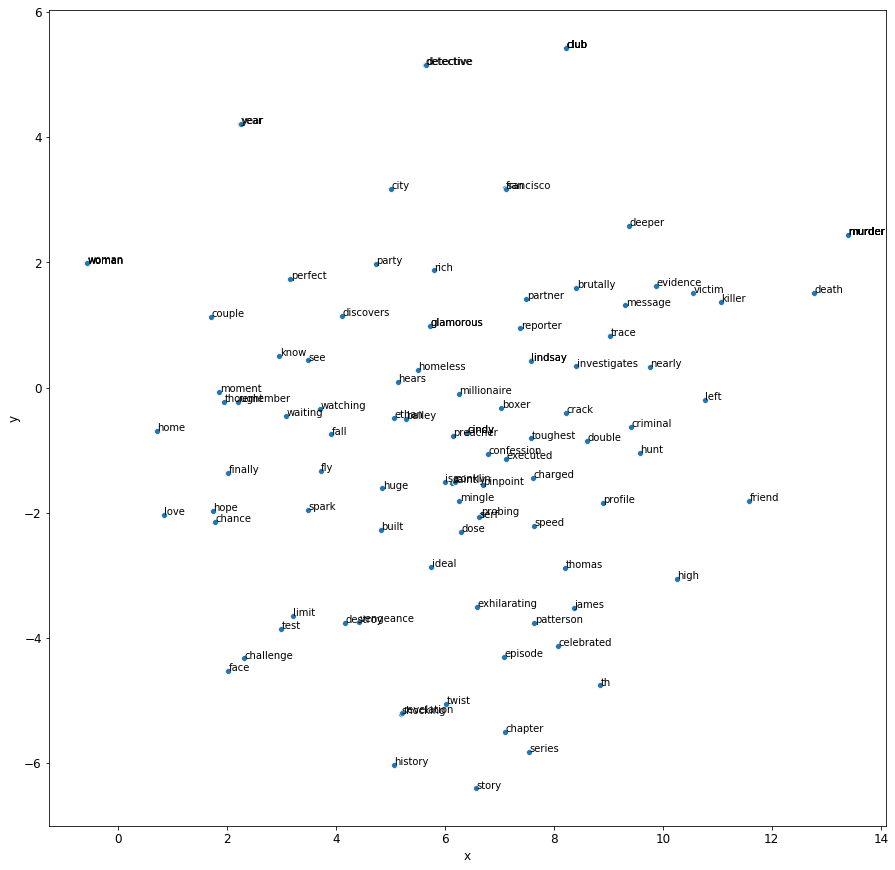

In [74]:
book_word_vec(108)